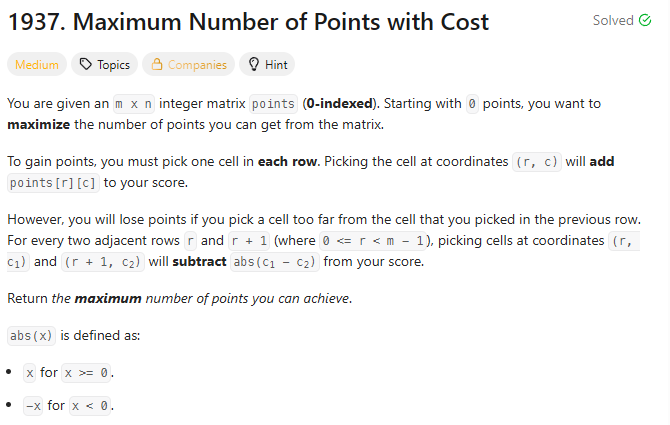



In [ ]:
class Solution:
    def maxPoints(self, points: List[List[int]]) -> int:
        rows = len(points)
        cols = len(points[0])
        if rows == 1:
            return max(points[0])
        if cols == 1:
            return sum([x[0] for x in points])
        maxValArr = [points[0][i] for i in range(cols)]
        for i in range(1, rows):
            # j, k = 1, cols - 2
            # while j < cols and k >= 0:
            for j in range(1, cols):
                maxValArr[j] = max(maxValArr[j - 1] - 1, maxValArr[j])
            for j in range(cols - 2, -1, -1):
                maxValArr[j] = max(maxValArr[j + 1] - 1, maxValArr[j])
    
            for j in range(cols):
                maxValArr[j] += points[i][j]
        return max(maxValArr)

#### or  

class Solution:
    def maxPoints(self, points: List[List[int]]) -> int:
        cols = len(points[0])
        previous_row = [0] * cols

        for row in points:
            # running_max holds the maximum value generated in the previous iteration of each loop
            running_max = 0

            # Left to right pass
            for col in range(cols):
                running_max = max(running_max - 1, previous_row[col])
                previous_row[col] = running_max

            running_max = 0
            # Right to left pass
            for col in range(cols - 1, -1, -1):
                running_max = max(running_max - 1, previous_row[col])
                previous_row[col] = (
                    running_max + row[col]
                )

        # Find maximum points in the last row
        return max(previous_row)